<a href="https://colab.research.google.com/github/JanuNandhini/24AD004_DSV_Team13./blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
# WEEK 3: DATA CLEANING SPRINT

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_csv("/content/Crime_Data_from_2020_to_Present.csv")

print("Missing values before cleaning:")
print(df.isnull().sum())

df.rename(columns={
    'Crm Cd Desc': 'Crime Description',
    'TIME OCC': 'Time',
    'DATE OCC': 'Date',
    'LAT': 'Latitude',
    'LON': 'Longitude'
}, inplace=True)

df.dropna(subset=['Latitude', 'Longitude'], inplace=True)

Missing values before cleaning:
DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes           100730
Vict Age               0
Vict Sex           95646
Vict Descent       95651
Premis Cd             10
Premis Desc          391
Weapon Used Cd    476959
Weapon Desc       476959
Status                 0
Status Desc            0
Crm Cd 1               9
Crm Cd 2          676094
Crm Cd 3          728601
Crm Cd 4          730396
LOCATION               0
Cross Street      612774
LAT                    1
LON                    1
dtype: int64


In [17]:
df['Crime Description'] = df['Crime Description'].fillna('Unknown')

df['Time'] = df['Time'].fillna(df['Time'].mode()[0])

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

df['Time'] = df['Time'].astype(str).str.zfill(4)
df['Hour'] = df['Time'].str[:2].astype(int)

df = df[(df['Hour'] >= 0) & (df['Hour'] <= 23)]

/tmp/ipython-input-2491426864.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [18]:

def time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['Time_of_Day'] = df['Hour'].apply(time_of_day)


df['Crime Description'] = df['Crime Description'].str.lower().str.strip()

In [19]:
crime_per_hour = df.groupby('Hour').size()

z_scores = np.abs(stats.zscore(crime_per_hour))
crime_per_hour_cleaned = crime_per_hour[z_scores < 3]

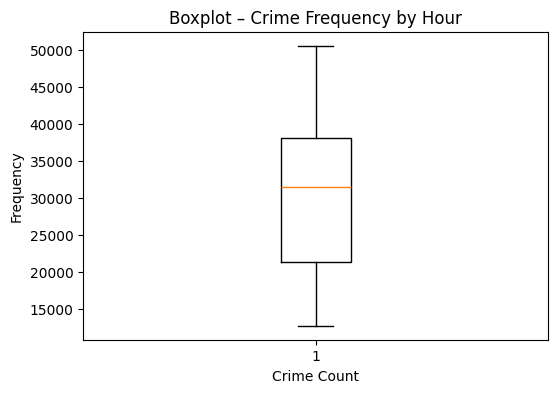

In [20]:
plt.figure(figsize=(6,4))
plt.boxplot(crime_per_hour.values)
plt.title("Boxplot – Crime Frequency by Hour")
plt.xlabel("Crime Count")
plt.ylabel("Frequency")
plt.show()

In [21]:
print("\nMissing values after cleaning:")
print(df.isnull().sum())

print("\nCleaned dataset preview:")
print(df[['Date','Hour','Time_of_Day','Latitude','Longitude','Crime Description']].head())

df.to_csv("cleaned_crime_data.csv", index=False)


Missing values after cleaning:
DR_NO                     0
Date Rptd                 0
Date                      0
Time                      0
AREA                      0
AREA NAME                 0
Rpt Dist No               0
Part 1-2                  0
Crm Cd                    0
Crime Description         0
Mocodes              100729
Vict Age                  0
Vict Sex              95645
Vict Descent          95650
Premis Cd                10
Premis Desc             391
Weapon Used Cd       476958
Weapon Desc          476958
Status                    0
Status Desc               0
Crm Cd 1                  9
Crm Cd 2             676093
Crm Cd 3             728600
Crm Cd 4             730395
LOCATION                  0
Cross Street         612773
Latitude                  0
Longitude                 0
Hour                      0
Time_of_Day               0
dtype: int64

Cleaned dataset preview:
        Date  Hour Time_of_Day  Latitude  Longitude  \
0 2020-03-01    21       Night   3